# **Computer Vision Challenge: Training ResNet-50 on the Flowers Dataset**

### Overview

This is a 102 category dataset, consisting of 102 flower categories. The flowers chosen to be flower commonly occuring in the United Kingdom. Each class consists of between 40 and 258 images. 
The images have large scale, pose and light variations. In addition, there are categories that have large variations within the category and several very similar categories. 

The challenge involves working with a **Computer Vision (CV)** task where i used a pre-trained **ResNet-50** model to train on the **Flowers dataset**.

## Key Concepts

### 1. ResNet-50
- ResNet-50 is a deep convolutional neural network (CNN) architecture with 50 layers.
- It's known for its ability to learn deep features from images, making it very effective for image classification tasks.
- ResNet-50 is pre-trained on a large dataset like ImageNet, meaning it already has learned useful features from millions of images.

### 2. Pre-trained Model
- A pre-trained model has already been trained on a large dataset and can be fine-tuned for specific tasks.
- Fine-tuning a pre-trained model on a new dataset often leads to better performance and faster training compared to training a model from scratch.

### 3. Flowers Dataset
- This dataset typically consists of images of different types of flowers.
- The goal is usually to classify images into different flower categories.


## Challenge Breakdown

### 1. Load the Pre-trained ResNet-50
- I imported the ResNet-50 model with pre-trained weights.
- The model is typically pre-trained on ImageNet, which has 1,000 classes.

### 2. Modify the Model
- Since ResNet-50 is pre-trained on ImageNet, we need to modify the last layer to match the number of classes in the Flowers dataset (e.g., 5 classes if there are 5 types of flowers, in this case we have 102 clases).
- I replace the final fully connected layer to output the correct number of classes(102).

### 3. Train the Model on the Flowers Dataset
- I fine-tuned the model by training it on the Flowers dataset.
- I used the features learned by ResNet-50 and adjusted them to better fit the specific characteristics of the flowers in the new dataset.

### 4. Evaluate the Model
- After training, i evaluate the model’s performance on a test set to see how well it classifies the flowers.

## Steps to Implement

1. **Data Preprocessing**:
   - Load and preprocess the Flowers dataset (e.g., resizing images, normalizing pixel values).

2. **Load and Modify ResNet-50**:
   - Load the pre-trained ResNet-50 model.
   - Modify the final layer to match the number of classes in the Flowers dataset.

3. **Fine-tune the Model**:
   - Train the model on the Flowers dataset.
   - Optionally, freeze the earlier layers of ResNet-50 to retain their pre-learned features and only train the modified layers.

4. **Evaluate**:
   - Test the model on unseen data and evaluate its performance.


In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [28]:
# import all the needed deep learning libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [29]:
# Define some constants
IMG_HEIGHT = 224  # ResNet-50 images
IMG_WIDTH  = 224   # Same with the height
BATCH_SIZE = 32
NUM_CLASSES = 102  # Number of Flowersclasses

In [30]:
# Step 1: Data Preprocessing

# Load training and validation data
train_data_dir = r"C:\Users\COLLINS\Desktop\Career\Image Data\Flowers Dataset\dataset\train" 
val_data_dir   = r"C:\Users\COLLINS\Desktop\Career\Image Data\Flowers Dataset\dataset\valid" 

# Load and preprocess training data
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='categorical'  # Multiclass classification
)

# Load and preprocess validation data
validation_generator = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

Found 6552 files belonging to 102 classes.
Found 818 files belonging to 102 classes.


In [5]:
# Step 2: Load Pre-trained Model

# Load ResNet-50 without the top layer and freeze its layers to save memory
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False  # Freezing the base model

In [6]:
# Step 3: Build the Model

# Use Sequential API to stack layers
model = Sequential([
    base_model,  # Add the ResNet-50 base model
    GlobalAveragePooling2D(),  # Pooling layer to reduce the dimensionality
    Dense(512, activation='relu'),  # Dense layer with 512 units
    Dense(NUM_CLASSES, activation='softmax')  # Output layer with softmax for multiclass classification
])

In [7]:
# check models parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 102)               52326     
                                                                 
Total params: 24,689,126
Trainable params: 1,101,414
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
# Step 4: Compile the Model

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Step 5: Train the Model

# Train the model with a reduced number of steps per epoch to avoid memory overload
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10)

Epoch 1/10
205/205 [==============================] - 1030s 5s/step - loss: 1.4640 - accuracy: 0.6627 - val_loss: 0.6903 - val_accuracy: 0.8154
Epoch 2/10
205/205 [==============================] - 1064s 5s/step - loss: 0.3143 - accuracy: 0.9147 - val_loss: 0.4882 - val_accuracy: 0.8753
Epoch 3/10
205/205 [==============================] - 968s 5s/step - loss: 0.1220 - accuracy: 0.9716 - val_loss: 0.4116 - val_accuracy: 0.8949
Epoch 4/10
205/205 [==============================] - 948s 5s/step - loss: 0.0630 - accuracy: 0.9876 - val_loss: 0.4005 - val_accuracy: 0.8875
Epoch 5/10
205/205 [==============================] - 945s 5s/step - loss: 0.0344 - accuracy: 0.9940 - val_loss: 0.4502 - val_accuracy: 0.8851
Epoch 6/10
205/205 [==============================] - 951s 5s/step - loss: 0.0184 - accuracy: 0.9974 - val_loss: 0.3662 - val_accuracy: 0.9034
Epoch 7/10
205/205 [==============================] - 946s 5s/step - loss: 0.0162 - accuracy: 0.9977 - val_loss: 0.3314 - val_accuracy: 0.90

In [10]:
# Step 6: Evaluate the Model

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

26/26 [==============================] - 109s 4s/step - loss: 0.6243 - accuracy: 0.8484
Validation Accuracy: 84.84%


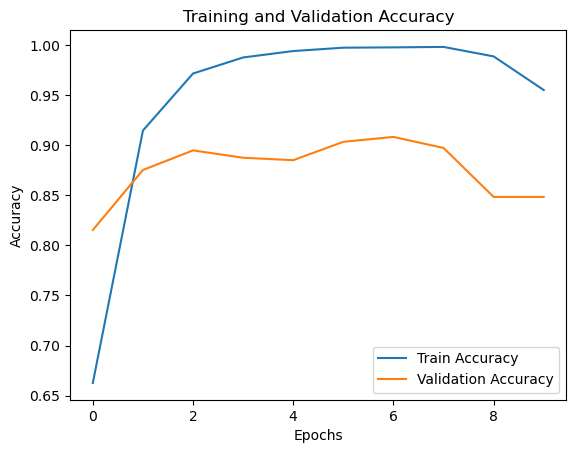

In [11]:
# Step 7: Plot Accuracy

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Step 8: Save the Model

# Save the trained model to a file
model.save('flower_classification_model.h5')

In [ ]:
# Step 9: Clear the session to free up memory

# free up memory
tf.keras.backend.clear_session()

In [21]:
# # Step 7: Make Predictions

# # Predicting
# import cv2
# image = cv2.imread(str(roses[0]))
# image_resized = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
# image = np.expand_dims(image_resized, axis = 0)
# print(image.shape)

# pred = model.predict(image)
# output_class = class_names[np.argmax(pred)]
# print("The predicted class is ", output_class)